NAME: Madhan M
Reg. No: 212225040213
MODEL COEFFECIENTS: 
     feature:    4523.40
     feature:    1694.22
     feature:    -392.57
     feature:    -816.36
   Intercept:   13223.41

MODEL PERFOMANCE:
         MSE: 16471505.90
        RMSE:    4058.51
         MAE:    2892.63
        RMAE:      53.78
   R-squared:       0.79


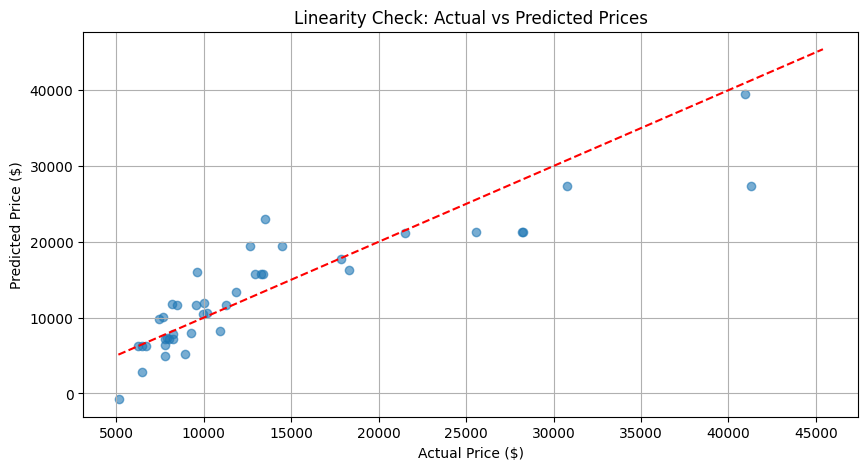


Durbin-Watson Statistic: 2.28 
(Values close to indicate no autocorrelation)



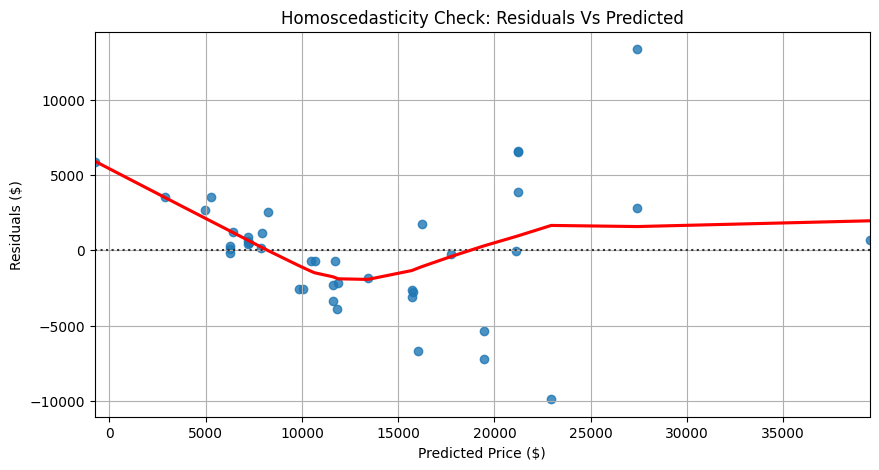

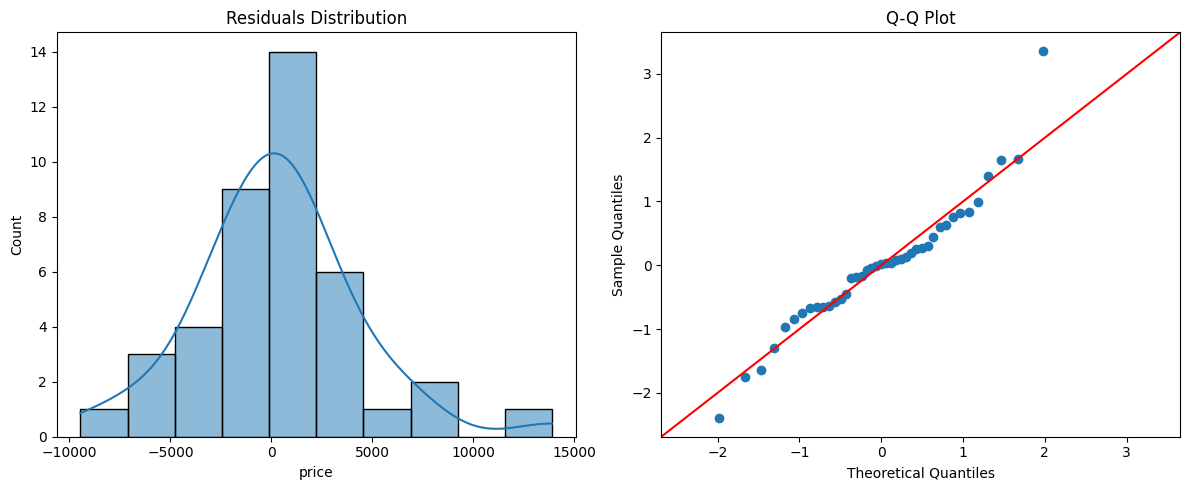

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('CarPrice_Assignment.csv')



x = df[['enginesize','horsepower','citympg','highwaympg']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

df.head()

print("NAME: Madhan M")
print("Reg. No: 212225040213")
print("MODEL COEFFECIENTS: ")

for feature, coef in zip(x.columns, model.coef_):
    print(f"{'feature':>12}: {coef:>10.2f}")
print(f"{'Intercept':>12}: {model.intercept_:>10.2f}")
print("\nMODEL PERFOMANCE:")
print(f"{'MSE':>12}: {mean_squared_error(y_test, y_pred):>10.2f}")
print(f"{'RMSE':>12}: {np.sqrt(mean_squared_error(y_test, y_pred)):>10.2f}")
print(f"{'MAE':>12}: {mean_absolute_error(y_test, y_pred):>10.2f}")
print(f"{'RMAE':>12}: {np.sqrt(mean_absolute_error(y_test, y_pred)):>10.2f}")
print(f"{'R-squared':>12}: {r2_score(y_test, y_pred):>10.2f}")

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Linearity Check: Actual vs Predicted Prices")

plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.grid(True)
plt.show()

residuals = y_test - y_pred
dw_test = sm.stats.durbin_watson(residuals)
print(f"\nDurbin-Watson Statistic: {dw_test:.2f}", "\n(Values close to indicate no autocorrelation)")
print()
plt.figure(figsize=(10,5))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color':'red'})
plt.title("Homoscedasticity Check: Residuals Vs Predicted")
plt.xlabel("Predicted Price ($)")
plt.ylabel("Residuals ($)")
plt.grid(True)
plt.show()

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
sns.histplot(residuals, kde=True, ax=ax1)
ax1.set_title("Residuals Distribution")
sm.qqplot(residuals, line='45', fit=True, ax=ax2)
ax2.set_title("Q-Q Plot")
plt.tight_layout()
plt.show()